Practice Data Analysis

In [1]:
import pandas as pd

# Load CSVs
movies_df = pd.read_csv('/Users/dusanzdravkovic/Desktop/Python-Finance/ml-32m/movies.csv')
links_df = pd.read_csv('/Users/dusanzdravkovic/Desktop/Python-Finance/ml-32m/links.csv')
ratings_df = pd.read_csv('/Users/dusanzdravkovic/Desktop/Python-Finance/ml-32m/ratings.csv')
tags_df = pd.read_csv('/Users/dusanzdravkovic/Desktop/Python-Finance/ml-32m/tags.csv')

# Preview 
print("Movies:")
print(movies_df.head(), "\n")

print("Links:")
print(links_df.head(), "\n")

print("Ratings:")
print(ratings_df.head(), "\n")

print("Tags:")
print(tags_df.head())

Movies:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy   

Links:
   movieId  imdbId   tmdbId
0        1  114709    862.0
1        2  113497   8844.0
2        3  113228  15602.0
3        4  114885  31357.0
4        5  113041  11862.0 

Ratings:
   userId  movieId  rating  timestamp
0       1       17     4.0  944249077
1       1       25     1.0  944250228
2       1       29     2.0  943230976
3       1       30     5.0  944249077
4       1       32 

In [2]:
print("Movies:", movies_df.shape)
print("Links:", links_df.shape)
print("Ratings:", ratings_df.shape)
print("Tags:", tags_df.shape)

Movies: (87585, 3)
Links: (87585, 3)
Ratings: (32000204, 4)
Tags: (2000072, 4)


In [3]:
print("Movies Columns:", movies_df.columns.tolist())
print("Links Columns:", links_df.columns.tolist())
print("Ratings Columns:", ratings_df.columns.tolist())
print("Tags Columns:", tags_df.columns.tolist())

Movies Columns: ['movieId', 'title', 'genres']
Links Columns: ['movieId', 'imdbId', 'tmdbId']
Ratings Columns: ['userId', 'movieId', 'rating', 'timestamp']
Tags Columns: ['userId', 'movieId', 'tag', 'timestamp']


In [7]:
average_ratings = ratings_df.groupby('movieId')['rating'].mean()
print(average_ratings.head())

movieId
1    3.897438
2    3.275758
3    3.139447
4    2.845331
5    3.059602
Name: rating, dtype: float64


In [13]:
top_rated = average_ratings.sort_values(ascending=False).head(5)
top_rated_with_titles = top_rated.reset_index().merge(movies_df, on='movieId')
print(top_rated_with_titles[['movieId', 'rating', 'title']])

   movieId  rating                                              title
0   199103     5.0          Franco Escamilla: For the Anecdote (2018)
1   268476     5.0                Rebuilding a Dream Christmas (2021)
2   171849     5.0                              Without Family (1984)
3   268054     5.0                            Time of the Gods (1992)
4   268090     5.0  A Godwink Christmas: Second Chance, First Love...


In [14]:
rating_counts = ratings_df['movieId'].value_counts()

# Merge count info into your top-rated-with-titles DataFrame
top_rated_with_titles['num_ratings'] = top_rated_with_titles['movieId'].map(rating_counts)

print(top_rated_with_titles[['movieId', 'title', 'rating', 'num_ratings']])

   movieId                                              title  rating  \
0   199103          Franco Escamilla: For the Anecdote (2018)     5.0   
1   268476                Rebuilding a Dream Christmas (2021)     5.0   
2   171849                              Without Family (1984)     5.0   
3   268054                            Time of the Gods (1992)     5.0   
4   268090  A Godwink Christmas: Second Chance, First Love...     5.0   

   num_ratings  
0            1  
1            1  
2            1  
3            1  
4            1  


In [15]:
filtered_movies = average_ratings[ratings_df['movieId'].value_counts() >= 100]

# Get top 5 highest rated (with at least 100 ratings)
top_filtered = filtered_movies.sort_values(ascending=False).head(5)

# Add titles
top_filtered_with_titles = top_filtered.reset_index().merge(movies_df, on='movieId')

print(top_filtered_with_titles[['movieId', 'title', 'rating']])

   movieId                             title    rating
0   171011            Planet Earth II (2016)  4.446830
1   159817               Planet Earth (2006)  4.444369
2   170705           Band of Brothers (2001)  4.426539
3      318  Shawshank Redemption, The (1994)  4.404614
4   171495                            Cosmos  4.330081


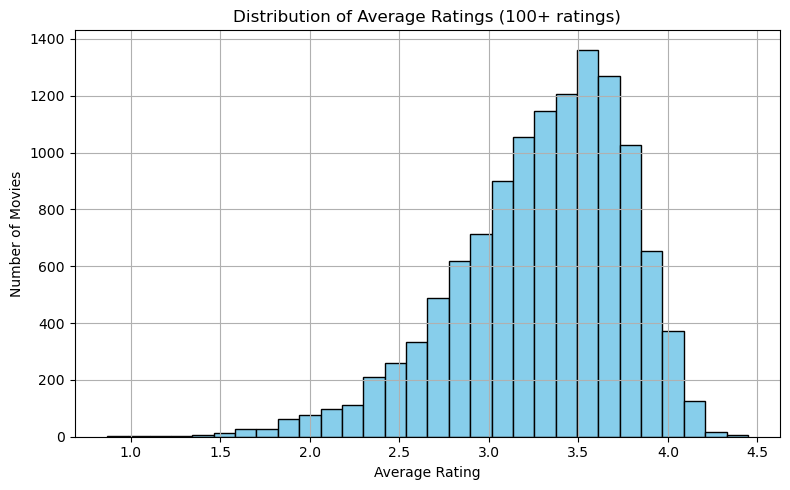

In [16]:
# EDA visualization
import matplotlib.pyplot as plt

# Filter for movies with at least 100 ratings
popular_movies = ratings_df['movieId'].value_counts()
popular_ids = popular_movies[popular_movies >= 100].index
filtered_avg = average_ratings.loc[popular_ids]

# Plot
plt.figure(figsize=(8, 5))
plt.hist(filtered_avg, bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Average Ratings (100+ ratings)')
plt.xlabel('Average Rating')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.tight_layout()
plt.show()

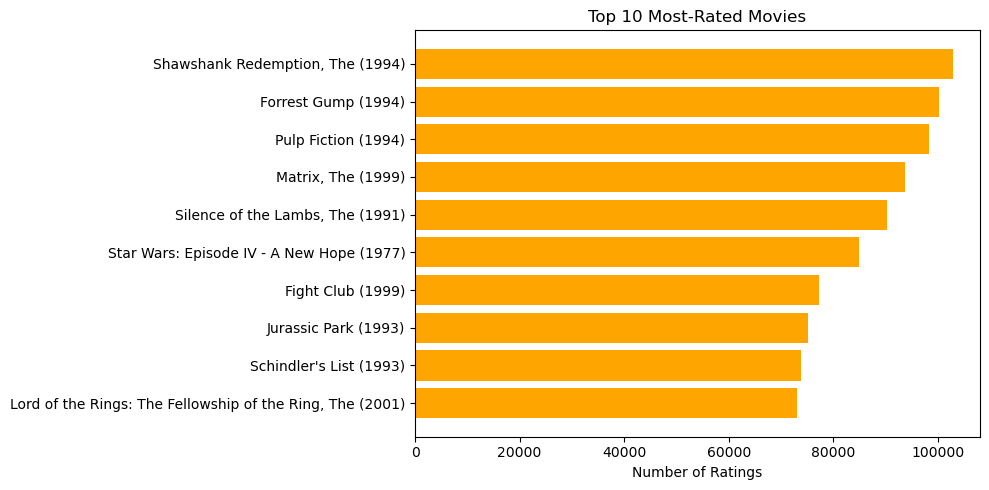

In [17]:
# Get counts
rating_counts = ratings_df['movieId'].value_counts()

# Merge with movie titles
most_rated = rating_counts.head(10).reset_index()
most_rated.columns = ['movieId', 'num_ratings']
most_rated = most_rated.merge(movies_df, on='movieId')

# Plot
plt.figure(figsize=(10, 5))
plt.barh(most_rated['title'], most_rated['num_ratings'], color='orange')
plt.xlabel('Number of Ratings')
plt.title('Top 10 Most-Rated Movies')
plt.gca().invert_yaxis()  # Highest at top
plt.tight_layout()
plt.show()